In [3]:
# YoutubeModule Class
from CrawlingModule import YoutubeBuilder

# KEY 파일로 읽어오기
KEY_FILE = open('./API_KEY.txt', 'r')

# API_KEY 할당
API_KEY = KEY_FILE.readline().split(':')[1] 

# YoutbeModule Instarnce 
bulider = YoutubeBuilder(API_KEY)

In [2]:
channelId = bulider.search_get_channelId('침착맨')
video_id_list = bulider.search_get_videoId_in_channel(channelId=channelId)
video_list = bulider.get_videos_in_videoId_list(videoId_list=video_id_list)

In [4]:
comments_list = bulider.get_comments(video_id_list)

In [1]:
# import pandas as pd

# # video_id,category_id,category_name,title,views_count,like_count,uploaded_at
# chim_df = pd.DataFrame(video_list, columns=['video_id', 'category_id', 'category_name', 'title', 'views_count', 'like_count', 'uploaded_at', 'tags'])

# # chim_df.created_at = pd.to_datetime(chim_df.uploaded_at)
# # df.to_csv('./데이터/침착맨_videos.csv', index=False)

# chim_df

In [1]:
# import pandas as pd
# import Preprocessing as prep
# chim_df = pd.read_csv('./데이터/침착맨_videos.csv', encoding='utf-8', engine='python')
# chim_df.uploaded_at = pd.to_datetime(chim_df.uploaded_at)


# chim_df.sort_values(by='views_count', ascending=False).head(10)
# chim_df.sort_values(by='like_count', ascending=False).head(10)

# chim_df.description = chim_df.description.apply(lambda x : prep.extract_hashtags(x, name='#침착맨 '))
# chim_df.description = chim_df.description.apply(lambda x : prep.remove_other_hashtag(x, chim_df, './chim_dict.txt'))

AttributeError: module 'Preprocessing' has no attribute 'remove_other_hashtag'

In [2]:
import pandas as pd
import numpy as np
import Preprocessing as prep
from konlpy.tag import Twitter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image
from collections import Counter

chim_comment_df = pd.read_csv('./데이터/chim_comments.csv', encoding='utf-8', engine='python')
chim_comment_df

video_id                  comment_id  \
0       7QnVBNbTVeM  Ugzmf2KCLNfGMvjOAIx4AaABAg   
1       7QnVBNbTVeM  UgwcByZZhnHLQtFb_od4AaABAg   
2       7QnVBNbTVeM  UgzK43w3es4_sUES3-p4AaABAg   
3       7QnVBNbTVeM  UgwTAaUHneZhtpK_LVZ4AaABAg   
4       7QnVBNbTVeM  Ugxs2qGT1LRd1z0gb9Z4AaABAg   
...             ...                         ...   
346128  SRS4AeJzhoc        UghVMiKNyVyI6HgCoAEC   
346129  SRS4AeJzhoc        Ugg8ahjVX6z-13gCoAEC   
346130  SRS4AeJzhoc        UgjYCSAFu6wUQ3gCoAEC   
346131  SRS4AeJzhoc        UggPw6PSvwpGGngCoAEC   
346132  SRS4AeJzhoc        Ugjcy5A1jstrn3gCoAEC   

                                                  comment  like_count  \
0                                           침소리와. 궤소리의 만남           0   
1        ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이날따라 침방장 왜케 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ           0   
2       오늘 영상을 요약하자면 "안드로이드는 전기양의 꿈을 꾸는가?"입니다 아아 필립K딕 ...           0   
3                                           궤도님 기계가 분명합니다           0   
4                                          월드컵 특강 너무 좋은데?           0   
...                                                   ...         ...   
346128                                 아재 게임피지컬 ㅁㅊㄷ ㅁㅊ 답답           0   
346129                            ㅋㅋㅋㅋㅋㅋ 초반부 설명하는거 웰케 웃겨요           0   
346130                                                 침하           0   
346131                                         캬 갓겜을 이제서야           0   
346132                                                 침하           0   

                  created_at            updated_at  
0       2023-02-27T06:21:37Z  2023-02-27T06:21:37Z  
1       2023-02-27T06:19:49Z  2023-02-27T06:19:49Z  
2       2023-02-27T06:01:43Z  2023-02-27T06:01:43Z  
3       2023-02-27T05:55:00Z  2023-02-27T05:55:00Z  
4       2023-02-27T05:53:29Z  2023-02-27T05:53:29Z  
...                      ...                   ...  
346128  2016-05-31T10:57:36Z  2016-05-31T10:57:36Z  
346129  2016-05-31T10:39:53Z  2016-05-31T10:39:53Z  
346130  2016-05-31T10:39:45Z  2016-05-31T10:39:45Z  
346131  2016-05-31T10:36:26Z  2016-05-31T10:36:26Z  
346132  2016-05-31T10:26:50Z  2016-05-31T10:26:50Z  

[346133 rows x 6 columns]

In [3]:
video_comment_list = list()
stopwords = prep.stopwords('./데이터/stopwords.txt')
unique_video_id = chim_comment_df.video_id.unique()

video_id_and_count = dict()

for video_id in unique_video_id:
    video_id_and_count[video_id] = chim_comment_df.loc[chim_comment_df.video_id == video_id].like_count.sum()

In [4]:
# 비디오별 댓글 좋아요 수
comments_like_sum = sorted(video_id_and_count.items(), key=lambda x:x[1], reverse=True)

video_on_comments_like_sum = list()

for idx, value in enumerate(comments_like_sum):
    if idx == 10:
        break
    video_on_comments_like_sum.append(value)

video_on_comments_like_sum

[('9LQsLPsKRq8', 249220),
 ('53XqM_ofaKw', 190285),
 ('IfOSBmBCWw0', 179199),
 ('Z1vgOoIuP5M', 177677),
 ('pkXiOnXAO90', 159250),
 ('IxaOybVE50Y', 157263),
 ('hnanNlDbsE4', 156647),
 ('CEDzUn9pOG0', 152166),
 ('WeGDixN-u48', 138191),
 ('V1ryDPaC6mo', 124719)]

In [5]:
twitter = Twitter()
test_list = []
new_df = list()

for video_id in video_on_comments_like_sum:
    new_df.append(pd.DataFrame(chim_comment_df.loc[chim_comment_df.video_id == video_id[0]].comment.apply(twitter.nouns)))
    


In [16]:
count = 0
text_list = list()
str = ''
font_path = r'C:/Windows/Fonts/malgun.ttf'
youtube_mask = np.array(Image.open('./데이터/youtube_logo.jfif'))

for df in new_df:
    for i in df.comment.iloc[range(len(df))]:
        str += ' '.join(i)
    text_list.append(str)
    print(text_list)
    print(df)

['큐배속 거 누가 생각 존나 죽겠네 취한 개 소리 느낌영어 제목세월 살 이 영상 벌써수박배속왜 무한도전 다시 볼때 여기만 또 공산당 드립 볼때 감탄최근 깜 침맨 수트 핏때 거 데 마지막 한쪽 승복 하나요펄 짐 레이 너 개 찰떡복숭아 얼굴 킹 누맛있쥬누가 더 얘기 그게 상관공산당 응 페이딱숭아 단맛 단맛 그 존나 신맛 껍질 맛남 물숭사실 이 영상 끝 사람 나머지 침 소리 정설복숭아 하나로 약이건 시리즈 넷플릭스몇개 월 이 동영상 매일 보고 누가걸 지금 왜 설득눈 감고 대가리 소리 타거 상남자 펄 작가 말 아가씨 코 터리 감독 이야기 과즙 일부 뿜어져 녹화 가기 전 하정우 직접 동안 주물럭 주물럭제 불면증 수면장애 치료 보약 영상 이제 침착 맨 복숭아 검색 루틴천도 복숭아 잗두 좀 주호민 대가리 지아 세 뭐 면 주호민 대가리 말 복숭아 욤천도 복숭아 진보 주호민 대가리 침불면증방장 피부천도 복숭아 진보 주호민 머리 침더 임썸네일 물 복숭아 사진 왜케 위화 감이건 레알 침 튜브 타임 레전드 상임 걸내 걸삼국지 빨졸리 배속 웃 일보 뽁슝몇번 토론오 존나 존나 논리나 천도 복숭아 진보 주호민 침 왜냐면 복숭아 주호민 머리 때문 람 댓글 달 아들 에바 알 부탁 껭제 발공산 맨오 진짜 알바 손님 개 빵 뻔아가씨 하정우 복숭아 물숭아 임닝겐 복숭아 뎈주호민 속물 렁 복숭아 사미 닼물렁 복숭아복숭아 전문가 복숭아 인간 복숭아주호민 볼때 말 복술복숭아 전문가 복숭아 인간 복숭아 뿜었닼인간 복 숭앙 닼누가 영어 자막새해 걸다음 천만 뷰 거웃기내 침투 부 입문 작이번 토론 복숭아게 벌써사랑개인 물복 뎅보 복숭아 토론 개진짜 근본주호민 강도 사건 이후 복 전환걸복숭아진짜 맛 복은 말 복 복파이 벌써침착 맨 뇌절 펄 왈 걸복은 공산당 물 복은 자유 민주주의 거지아닠 복숭아 토론 괴한 곸인트 복 물복 안 딱숭 물숭거 침착 맨웃기 젠일 때 절대 보지의상 열정물복 선호 괴한 물리 친 대인배 주호민숭어 먹을빠 생쌀 맛나 딱숭침펄 토론 또 해주 새호민 이형 딱숭아 더 강도 제압내일 수능 현역

In [14]:
text_list

['큐배속 거 누가 생각 존나 죽겠네 취한 개 소리 느낌영어 제목세월 살 이 영상 벌써수박배속왜 무한도전 다시 볼때 여기만 또 공산당 드립 볼때 감탄최근 깜 침맨 수트 핏때 거 데 마지막 한쪽 승복 하나요펄 짐 레이 너 개 찰떡복숭아 얼굴 킹 누맛있쥬누가 더 얘기 그게 상관공산당 응 페이딱숭아 단맛 단맛 그 존나 신맛 껍질 맛남 물숭사실 이 영상 끝 사람 나머지 침 소리 정설복숭아 하나로 약이건 시리즈 넷플릭스몇개 월 이 동영상 매일 보고 누가걸 지금 왜 설득눈 감고 대가리 소리 타거 상남자 펄 작가 말 아가씨 코 터리 감독 이야기 과즙 일부 뿜어져 녹화 가기 전 하정우 직접 동안 주물럭 주물럭제 불면증 수면장애 치료 보약 영상 이제 침착 맨 복숭아 검색 루틴천도 복숭아 잗두 좀 주호민 대가리 지아 세 뭐 면 주호민 대가리 말 복숭아 욤천도 복숭아 진보 주호민 대가리 침불면증방장 피부천도 복숭아 진보 주호민 머리 침더 임썸네일 물 복숭아 사진 왜케 위화 감이건 레알 침 튜브 타임 레전드 상임 걸내 걸삼국지 빨졸리 배속 웃 일보 뽁슝몇번 토론오 존나 존나 논리나 천도 복숭아 진보 주호민 침 왜냐면 복숭아 주호민 머리 때문 람 댓글 달 아들 에바 알 부탁 껭제 발공산 맨오 진짜 알바 손님 개 빵 뻔아가씨 하정우 복숭아 물숭아 임닝겐 복숭아 뎈주호민 속물 렁 복숭아 사미 닼물렁 복숭아복숭아 전문가 복숭아 인간 복숭아주호민 볼때 말 복술복숭아 전문가 복숭아 인간 복숭아 뿜었닼인간 복 숭앙 닼누가 영어 자막새해 걸다음 천만 뷰 거웃기내 침투 부 입문 작이번 토론 복숭아게 벌써사랑개인 물복 뎅보 복숭아 토론 개진짜 근본주호민 강도 사건 이후 복 전환걸복숭아진짜 맛 복은 말 복 복파이 벌써침착 맨 뇌절 펄 왈 걸복은 공산당 물 복은 자유 민주주의 거지아닠 복숭아 토론 괴한 곸인트 복 물복 안 딱숭 물숭거 침착 맨웃기 젠일 때 절대 보지의상 열정물복 선호 괴한 물리 친 대인배 주호민숭어 먹을빠 생쌀 맛나 딱숭침펄 토론 또 해주 새호민 이형 딱숭아 더 강도 제압내일 수능 현역

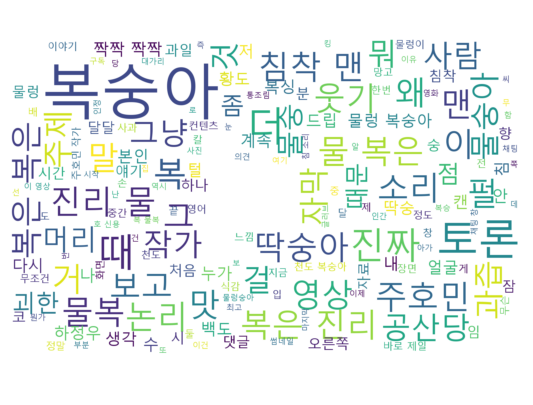

In [273]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

from PIL import Image


font_path = r'C:/Windows/Fonts/malgun.ttf'

youtube_mask = np.array(Image.open('./yo.jfif'))

wc = WordCloud(font_path=font_path, background_color='white', stopwords=['개소리', '존나', '개'], mask=youtube_mask, max_font_size=30, scale=7).generate(text_list[0])
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()
# wc.to_file(filename="침착맨_복숭아_대전.png")